### Sample exercise on FastAI library

In [0]:
from fastai.vision import *

# Download CAMVID dataset from FastAI library using 'untar_data' method.
path = untar_data(URLs.CAMVID)

In [120]:
# Check directory structure of CAMVID dataset.
path.ls()

[PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt')]

In [147]:
import os
path_label  = os.path.join(path, 'labels')
path_images = os.path.join(path, 'images')

print("Label  path : ", path_label)
print("Images path : ", path_images)

# Get names of image files
img_name   = get_image_files(path_images)
label_name = get_image_files(path_label)

# Show random image and its label
img = open_image(img_name[20])
img.show(figsize=(10, 10))

print(img.shape)

Label  path :  /content/drive/My Drive/Colab Notebooks/Capstone/Selected/labels
Images path :  /content/drive/My Drive/Colab Notebooks/Capstone/Selected/images


FileNotFoundError: ignored

In [122]:
print(img_name[20])
print(img_name[20].stem)
print(img_name[20].suffix)

/root/.fastai/data/camvid/images/0016E5_07920.png
0016E5_07920
.png


In [123]:
# Creating inline function to find mask/label for corresponding image.
get_label_func = lambda x: os.path.join(path_label, f'{x.stem}_P{x.suffix}')
print(get_label_func(img_name[20]))

/root/.fastai/data/camvid/labels/0016E5_07920_P.png


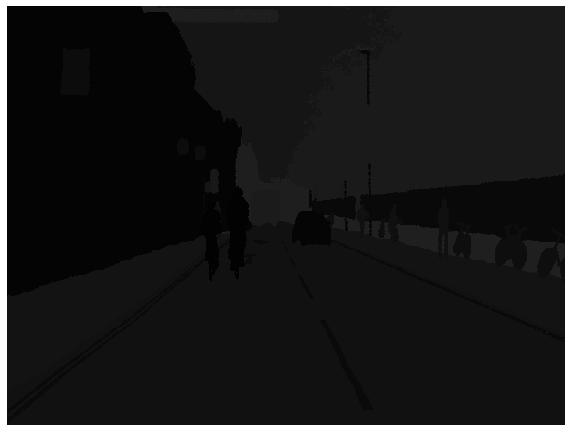

In [124]:
# open_image to represent mask in grayscal
img_gray = open_image(get_label_func(img_name[20]))
img_gray.show(figsize=(10,10))

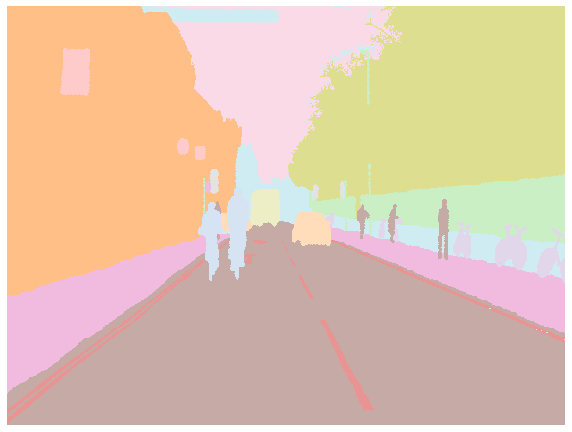

In [125]:
# Use open_mask function for better view
img_rgb = open_image(img_name[20])
img_label = open_mask(get_label_func(img_name[20]))
img_label.show(figsize=(10, 10))

# Append RGB, grayscale image and colored mask in list for display
images_and_masks = []
images_and_masks.append(img_rgb)
images_and_masks.append(img_label)
images_and_masks.append(img_gray)

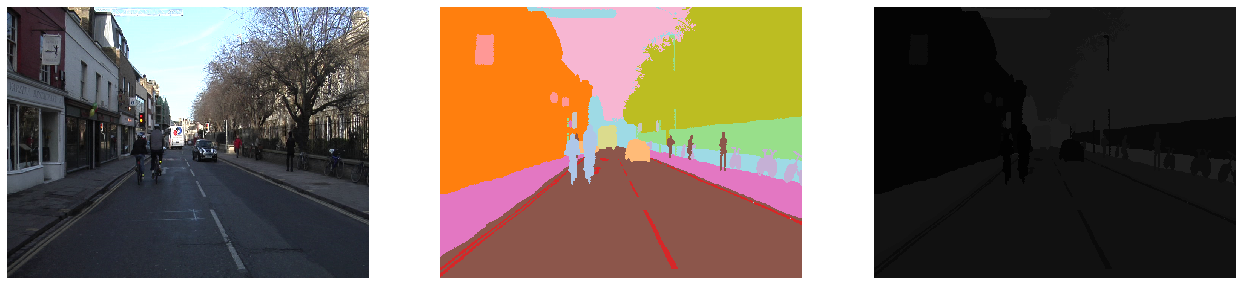

In [126]:
# Plot all the RGB image and masks
_,axes = plt.subplots(1,3,figsize=(22, 22))
for i,ax in enumerate(axes):     
    images_and_masks[i].show(ax=ax, alpha=2)    

In [0]:
# img.shape

In [0]:
# Run length encoding format for above masks
# # run_len_enoding = rle_encode(img_label.data)
# run_len_enoding

In [0]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [0]:
# cd "/content/drive/My Drive/Colab Notebooks/Residency-9/External Assignment/train"

In [0]:
# # Salt prediction image handson
# img_salt_mask = open_mask('masks/0c02f95a08.png')
# img_salt_gray = open_image('masks/0c02f95a08.png')
# img_salt_rgb  = open_image('images/0c02f95a08.png')
# imgs_salt = []
# imgs_salt.append(img_salt_rgb)
# imgs_salt.append(img_salt_gray)
# imgs_salt.append(img_salt_mask)
# imgs_salt

In [0]:
# _,axes = plt.subplots(1,3,figsize=(20, 20))
# for i,ax in enumerate(axes):     
#     imgs_salt[i].show(ax=ax, alpha=2) 

In [0]:
# # Run length encoding format for above masks
# run_len_enoding = rle_encode(img_salt_gray.data)
# run_len_enoding

In [0]:
# # Run length encoding format for above masks
# run_len_enoding1 = rle_encode(img_salt_mask.data)
# run_len_enoding1

In [0]:
os.environ["CUDA_LAUNCH_BLOCKING"]="1"

In [154]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
cd '/content/drive/My Drive/Colab Notebooks/Capstone/Selected'

/content/drive/My Drive/Colab Notebooks/Capstone/Selected


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Capstone/Selected'

In [0]:
train_dir = os.path.join(path, 'train_color')
label_dir = os.path.join(path, 'train_label')

In [158]:
img_names = get_image_files(train_dir)
label_names = get_image_files(label_dir)

img_names[:3]

[PosixPath('/content/drive/My Drive/Colab Notebooks/Capstone/Selected/train_color/170908_061534377_Camera_6.jpg'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Capstone/Selected/train_color/170908_061534516_Camera_5.jpg'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Capstone/Selected/train_color/170908_061534655_Camera_5.jpg')]

In [159]:
label_names[:3]

[PosixPath('/content/drive/My Drive/Colab Notebooks/Capstone/Selected/train_label/170908_061534099_Camera_6_instanceIds.png'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Capstone/Selected/train_label/170908_061534516_Camera_5_instanceIds.png'),
 PosixPath('/content/drive/My Drive/Colab Notebooks/Capstone/Selected/train_label/170908_061534655_Camera_5_instanceIds.png')]

In [160]:
get_y_label = lambda x : os.path.join(label_dir, f'{x.stem}_instanceIds.png')
print(get_y_label(img_names[1]))

/content/drive/My Drive/Colab Notebooks/Capstone/Selected/train_label/170908_061534516_Camera_5_instanceIds.png


In [0]:
sample_img = open_image(img_names[20])
sample_label_grey = open_image(get_y_label(img_names[20]), convert_mode=None)
sample_label = open_mask(get_y_label(img_names[20]), convert_mode=None)
sample = []
sample.append(sample_img)
sample.append(sample_label_grey)
sample.append(sample_label)

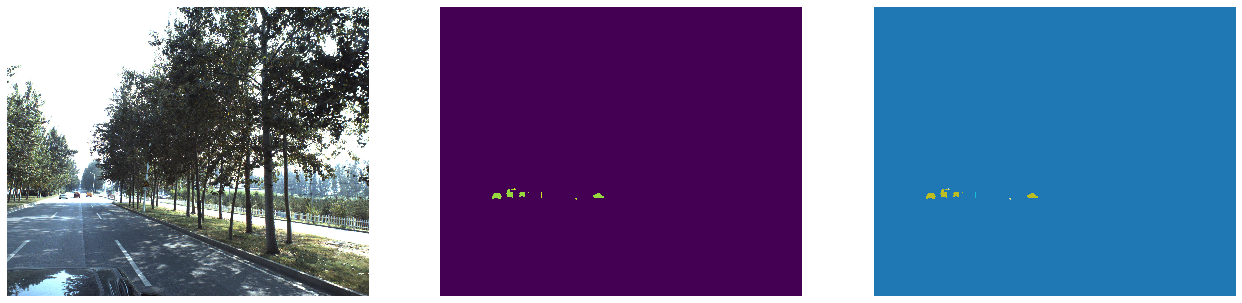

In [162]:
# Plot all the RGB image and masks
_,axes = plt.subplots(1,3,figsize=(22, 22))
for i,ax in enumerate(axes):     
    sample[i].show(ax=ax, alpha=2)    

In [163]:
np.unique(sample_label.data//1000)

array([ 0, 33, 35, 36, 39])

In [0]:
src = (SegmentationItemList.from_folder(train_dir)
                           .split_none()
                           .label_from_func(get_y_label, classes = {33000:'car', 39000:'bus'}))
    
data = (src.transform(get_transforms(), size=224, tfm_y=True)
           .databunch(bs=10)
           .normalize(imagenet_stats))

In [170]:
data.show_batch(2, figsize=(15, 15))

RuntimeError: ignored

In [0]:
learn = unet_learner(data, models.resnet34, metrics=accuracy, wd=1e-2)

In [0]:
lr=1e-5
learn.fit_one_cycle(1, slice(lr))

In [166]:
print(torch.__version__)

1.3.1
